In [3]:
from pylab import rcParams
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
import numpy as np
import pandas as pd
import plotly
from IPython.display import Image
import matplotlib
from IPython.core.interactiveshell import InteractiveShell
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 8, 5
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 8)
init_notebook_mode(connected=True)
pd.options.display.float_format = '{:,.1f}'.format
InteractiveShell.ast_node_interactivity = 'all'

df = pd.read_csv('Video_Games_Sales.csv')

СОРТИРОВКА

In [9]:
df.head().T

,0,2,3,6,7
Name,Wii Sports,Mario Kart Wii,Wii Sports Resort,New Super Mario Bros.,Wii Play
Platform,Wii,Wii,Wii,DS,Wii
Year_of_Release,2006,2008,2009,2006,2006
Genre,Sports,Racing,Sports,Platform,Misc
Publisher,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo
NA_Sales,41.4,15.7,15.6,11.3,14.0
EU_Sales,29.0,12.8,10.9,9.1,9.2
JP_Sales,3.8,3.8,3.3,6.5,2.9
Other_Sales,8.4,3.3,3.0,2.9,2.8
Global_Sales,82.5,35.5,32.8,29.8,28.9


In [4]:
df = df.dropna()

In [5]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [8]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head().T

,0,2,3,6,7
Name,Wii Sports,Mario Kart Wii,Wii Sports Resort,New Super Mario Bros.,Wii Play
Platform,Wii,Wii,Wii,DS,Wii
Year_of_Release,2006,2008,2009,2006,2006
Genre,Sports,Racing,Sports,Platform,Misc
Global_Sales,82.5,35.5,32.8,29.8,28.9
Critic_Score,76.0,82.0,80.0,89.0,58.0
Critic_Count,51,73,73,65,41
User_Score,8.0,8.3,8.0,8.5,6.6
User_Count,322,709,192,431,129
Rating,E,E,E,E,E


<AxesSubplot:xlabel='Year_of_Release'>

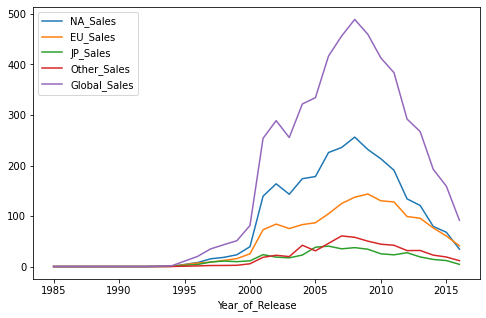

In [7]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

In [10]:
sales_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_of_Release
0,41.4,29.0,3.8,8.4,82.5,2006
2,15.7,12.8,3.8,3.3,35.5,2008
3,15.6,10.9,3.3,3.0,32.8,2009
6,11.3,9.1,6.5,2.9,29.8,2006
7,14.0,9.2,2.9,2.8,28.9,2006


<AxesSubplot:xlabel='Year_of_Release'>

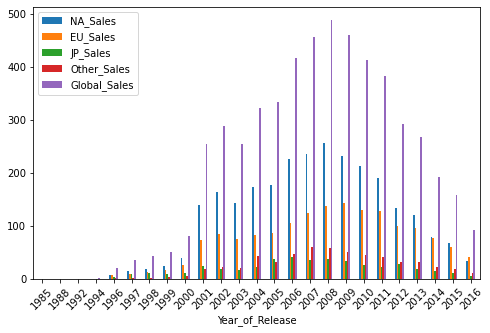

In [14]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные scatter plots для соответствующих пар признаков. Для сохранения графиков в файлы стоит использовать метод savefig.

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

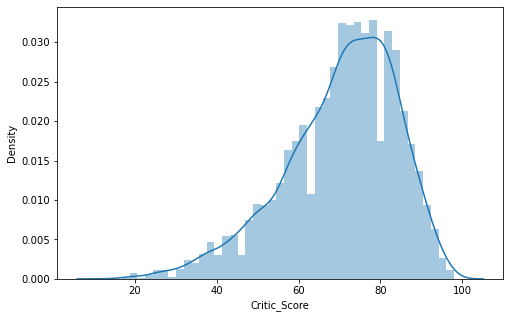

In [15]:
sns.distplot(df.Critic_Score)

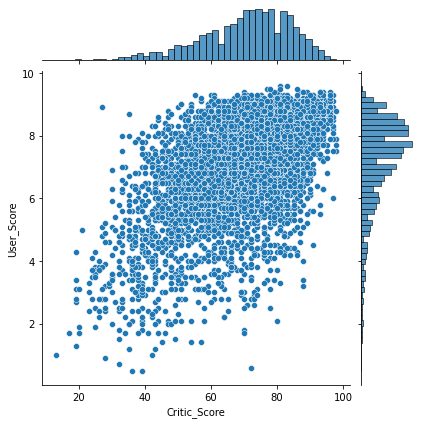

In [16]:
sns.jointplot(df.Critic_Score, df.User_Score)

<AxesSubplot:xlabel='Global_Sales', ylabel='Platform'>

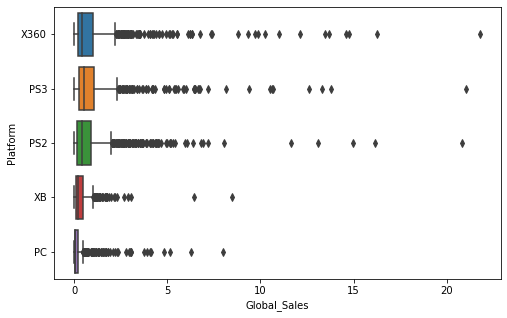

In [17]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y='Platform', x='Global_Sales', data=df[df.Platform.isin(top_platforms)], orient = 'h')

In [ ]:
platform_genre_sales = df.pivot_table(
                        index='Platform',
                        columns='Genre',
                        values='Global_Sales',
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=.4)

In [ ]:
#Посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

In [ ]:
#создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global_Sales'
)

In [ ]:
#создаем линию для числа вышедших игр
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

In [ ]:
#Определяем массив данных и задаем title графика в Layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

В plotly строится визуализация объекта Figure, который состоит из данных (массив линий, которые в библиотеке называются traces) и оформления/стиля, за который отвечает объект layout. В простых случаях можно вызывать функцию iplot и просто от массива traces.

Параметр show_link отвечает за ссылки на online-платформу plot.ly на графиках. Поскольку обычно это функциональность не нужна, то я предпочитаю скрывать ее для предотвращения случайных нажатий.

In [ ]:
#создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [ ]:
#Можно открыть график в html файле
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

In [ ]:
# считаем число проданных и вышедших игр по платформам
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [ ]:
# создаем Box trace для каждого жанра из наших данных
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )

# визуализируем данные
iplot(data, show_link = False)

In [ ]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [ ]:
df['churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов')


In [ ]:
corr_matrix = df.drop(['state', 'international plan', 'voice mail plan',
                      'area code'], axis=1).corr()

In [ ]:
sns.heatmap(corr_matrix);

In [ ]:
features = list(set(df.columns) - set(['state', 'international plan', 'voice mail plan',  'area code',
                                      'total day charge',   'total eve charge',   'total night charge',
                                        'total intl charge', 'churn']))

df[features].hist(figsize=(20,12));

In [ ]:
sns.pairplot(df[features + ['churn']], hue='churn');

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='churn', y=feat, data=df, ax=axes[idx / 4, idx % 4])
    axes[idx / 4, idx % 4].legend()
    axes[idx / 4, idx % 4].set_xlabel('churn')
    axes[idx / 4, idx % 4].set_ylabel(feat);

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0]);
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1]);

In [ ]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
# преобразуем все признаки в числовые, выкинув штаты
X = df.drop(['churn', 'state'], axis=1)
X['international plan'] = pd.factorize(X['international plan'])[0]
X['voice mail plan'] = pd.factorize(X['voice mail plan'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

In [ ]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);